## Q2 Modelling 2020 

In [14]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


%matplotlib inline

In [15]:
import os
import glob
from pathlib import Path

In [16]:
home = str(Path.home())

os.getcwd()
old_dir = os.getcwd()
print(os.getcwd())


C:\Users\imeld\work\ML-Project


In [76]:
# constant value switches
MAKE_FILES=True
READ_FILES = True
FILE_MASK = "dublinbikes*.csv"
#FILE_MASK = "dublinbikes_2021*.csv"

In [13]:
#full_data.to_csv("data/full_data.csv", index= False)

In [77]:
# write out full data to csv file
#if MAKE_FILES : full_data.to_csv("data/full_data.csv", index= False)
#if READ_FILES : full_data = pd.read_csv("data/full_data.csv")
if READ_FILES : data = pd.read_csv("data/station_data.csv")

print(full_data.sample(3))


         STATION ID                 TIME         LAST UPDATED  \
990634           74  2018-09-01 06:25:01  2018-09-01 06:20:28   
155942           50  2018-08-06 18:10:02  2018-08-06 18:05:53   
1666719          76  2018-09-22 04:55:02  2018-09-22 04:45:05   

                        NAME  BIKE STANDS  AVAILABLE BIKE STANDS  \
990634    OLIVER BOND STREET           30                     24   
155942          GEORGES LANE           40                     22   
1666719  MARKET STREET SOUTH           38                     16   

         AVAILABLE BIKES STATUS              ADDRESS   LATITUDE  LONGITUDE  \
990634                 6   Open   Oliver Bond Street  53.343891  -6.280531   
155942                18   Open        George's Lane  53.350231  -6.279696   
1666719               22   Open  Market Street South  53.342297  -6.287661   

         usage  
990634    -1.0  
155942     3.0  
1666719    0.0  


In [66]:
full_data.columns.values
#full_data = full_data.sample(1000)

In [21]:
#print(full_data.sample(3))
station_names_mask = full_data['NAME'].isin(station_names)
data = full_data[station_names_mask]
# write out full data to csv file

if MAKE_FILES : data.to_csv("data/station_data.csv", index=False)

In [6]:

if READ_FILES : data = pd.read_csv("data/station_data.csv")


In [22]:
print((data['NAME']).unique())

['HANOVER QUAY' 'ST JAMES HOSPITAL (LUAS)' 'FITZWILLIAM SQUARE EAST']


In [25]:
data.describe()
#data.head()

,STATION ID,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,LATITUDE,LONGITUDE,usage
count,45111.000000,45111.0,45111.000000,45111.000000,45111.000000,45111.000000,45111.000000
mean,79.000000,40.0,26.831704,13.075104,53.340229,-6.260335,-0.017335
std,8.602421,0.0,12.402923,12.319148,0.003721,0.023737,1.896563
min,68.000000,40.0,0.000000,0.000000,53.335213,-6.292951,-39.000000
25%,68.000000,40.0,17.000000,2.000000,53.335213,-6.292951,0.000000
50%,80.000000,40.0,31.000000,9.000000,53.341358,-6.250900,0.000000
75%,89.000000,40.0,38.000000,22.000000,53.344116,-6.237153,0.000000
max,89.000000,40.0,40.000000,40.000000,53.344116,-6.237153,40.000000


In [26]:
#full_data['usage'] = full_data['AVAILABLE BIKES'].diff()
data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,usage
9108,68,2018-08-01 12:30:02,2018-08-01 12:24:49,HANOVER QUAY,40,3,37,Open,Hanover Quay,53.344116,-6.237153,10.0
9109,68,2018-08-01 12:35:02,2018-08-01 12:24:49,HANOVER QUAY,40,3,37,Open,Hanover Quay,53.344116,-6.237153,0.0
9110,68,2018-08-01 12:40:02,2018-08-01 12:37:22,HANOVER QUAY,40,2,38,Open,Hanover Quay,53.344116,-6.237153,1.0
9111,68,2018-08-01 12:45:02,2018-08-01 12:37:22,HANOVER QUAY,40,2,38,Open,Hanover Quay,53.344116,-6.237153,0.0
9112,68,2018-08-01 12:50:02,2018-08-01 12:48:24,HANOVER QUAY,40,2,38,Open,Hanover Quay,53.344116,-6.237153,0.0


In [29]:
ct1 = pd.crosstab(index = data['STATION ID'], columns = data['NAME'])
ct1

NAME,FITZWILLIAM SQUARE EAST,HANOVER QUAY,ST JAMES HOSPITAL (LUAS)
STATION ID,,,
68,0,15037,0
80,0,0,15037
89,15037,0,0


Based on the clustering the location stations choosen were: 
- 'HANOVER QUAY' in Grand Canal Dock (blue) + FITZWILLIAM SQUARE EAST
- 'YORK STREET EAST' in south Dublin  (red) + 'NEW CENTRAL BANK'
- 'MATER HOSPITAL'- north side, hospital (green) (rotunda parnell st north)

In [35]:
locations  = data[['LATITUDE', 'LONGITUDE', 'cluster']].drop_duplicates()
#data.sample(50)
colordict = {0: 'blue', 1: 'red', 2: 'green'}
dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.5)

for LATITUDE, LONGITUDE, cluster in zip(locations['LATITUDE'],locations['LONGITUDE'],locations['cluster']):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        color = 'b',
        radius = 8,
        fill_color=colordict[cluster],
        fill=True,
        fill_opacity=0.9
        ).add_to(dublin_map)
dublin_map   

In [83]:
#full_data

In [8]:
#cluster stations
data = data[data['STATUS'] == 'Open']
#data = data[(data['LAST UPDATED'] >= '2019-07-01') & (data['LAST UPDATED'] < '2020-04-01')]
#data = data[(data['LAST UPDATED'] < '2019-12-01') | (data['LAST UPDATED'] >= '2020-02-01')]
#?
#remove rows where no update actually occurs
data = data.drop(['TIME'], axis = 1)
data.drop_duplicates(keep= 'first',inplace=True)

#get date and time columns
data['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in data["LAST UPDATED"]]
data['LAST UPDATED'] = [dt.datetime.time(d) for d in data['DATETIME']] 
data['DATE'] = [dt.datetime.date(d) for d in data['DATETIME']] 
data['date_for_merge'] = data['DATETIME'].dt.round('H')

#create important features
data['OCCUPANCY_PCT'] =  data['AVAILABLE BIKES'] / data['BIKE STANDS']
data['FULL'] = np.where(data['OCCUPANCY_PCT'] == 0, 1,0 )
data['EMPTY'] = np.where(data['OCCUPANCY_PCT'] == 1, 1,0 )

### create time aggregates needed for clustering
# weekday/saturday/sunday
data['DAY_NUMBER'] = data.DATETIME.dt.dayofweek
data['DAY_TYPE'] = np.where(data['DAY_NUMBER'] <= 4, 'Weekday', (np.where(data['DAY_NUMBER'] == 5, 'Saturday', 'Sunday')))

def bin_time(x):
    if x.time() < dt.time(6):
        return "Overnight "
    elif x.time() < dt.time(11):
        return "6AM-10AM "
    elif x.time() < dt.time(16):
        return "11AM-3PM "
    elif x.time() < dt.time(20):
        return "4PM-7PM "
    elif x.time() <= dt.time(23):
        return "8PM-11PM "
    else:
        return "Overnight "


data["TIME_TYPE"] = data['DATETIME'].apply(bin_time)
data['HOUR'] = data['DATETIME'].dt.hour
data['MONTH'] = data['DATETIME'].dt.month
data['CLUSTER_GROUP'] = data['TIME_TYPE'] + data['DAY_TYPE']

data.sample(5)

,Unnamed: 0,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
10258588,1751149,116,22:17:12,BROADSTONE,30,15,15,Open,Broadstone,53.354698,...,2021-11-28 22:00:00,0.500000,0,0,6,Sunday,8PM-11PM,22,11,8PM-11PM Sunday
3327090,562404,111,01:23:37,MOUNTJOY SQUARE EAST,40,31,9,Open,Mountjoy Square East,53.356716,...,2021-04-18 01:00:00,0.225000,0,0,6,Sunday,Overnight,1,4,Overnight Sunday
1999687,1999687,78,20:05:11,MATER HOSPITAL,40,19,21,Open,Mater Hospital,53.359966,...,2021-03-08 20:00:00,0.525000,0,0,0,Weekday,8PM-11PM,20,3,8PM-11PM Weekday
1432672,1432672,18,05:31:19,GRANTHAM STREET,30,16,14,Open,Grantham Street,53.334122,...,2021-02-17 06:00:00,0.466667,0,0,2,Weekday,Overnight,5,2,Overnight Weekday
1387205,1387205,73,03:04:47,FRANCIS STREET,30,3,27,Open,Francis Street,53.342079,...,2021-02-15 03:00:00,0.900000,0,0,0,Weekday,Overnight,3,2,Overnight Weekday


### Time cluster 

## model results


CLUSTER_GROUP,NAME,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday,Cluster
0,AVONDALE ROAD,108,53.359406,-6.276142,0.278113,0.294698,0.307785,0.269566,0.271203,0.347006,0.316856,0.268773,0.278609,0.289457,0.299145,0.381716,0.372831,0.306346,0.399911,0
1,BENSON STREET,90,53.344154,-6.233451,0.175842,0.223499,0.358078,0.239944,0.284770,0.274678,0.207506,0.269740,0.351126,0.271069,0.325013,0.246672,0.230739,0.284623,0.243360,2
2,BLACKHALL PLACE,88,53.348801,-6.281637,0.437836,0.476926,0.377601,0.514850,0.520750,0.463503,0.538152,0.584612,0.485473,0.578359,0.600090,0.608762,0.636962,0.635371,0.680953,1
3,BLESSINGTON STREET,2,53.356770,-6.268140,0.317861,0.338154,0.346412,0.282567,0.372680,0.330328,0.332187,0.311392,0.305859,0.318536,0.404416,0.425904,0.384310,0.361865,0.475385,0
4,BOLTON STREET,3,53.351181,-6.269859,0.442709,0.397959,0.333384,0.492425,0.443683,0.371584,0.396903,0.464866,0.298106,0.529354,0.470108,0.422992,0.508494,0.547341,0.441878,3


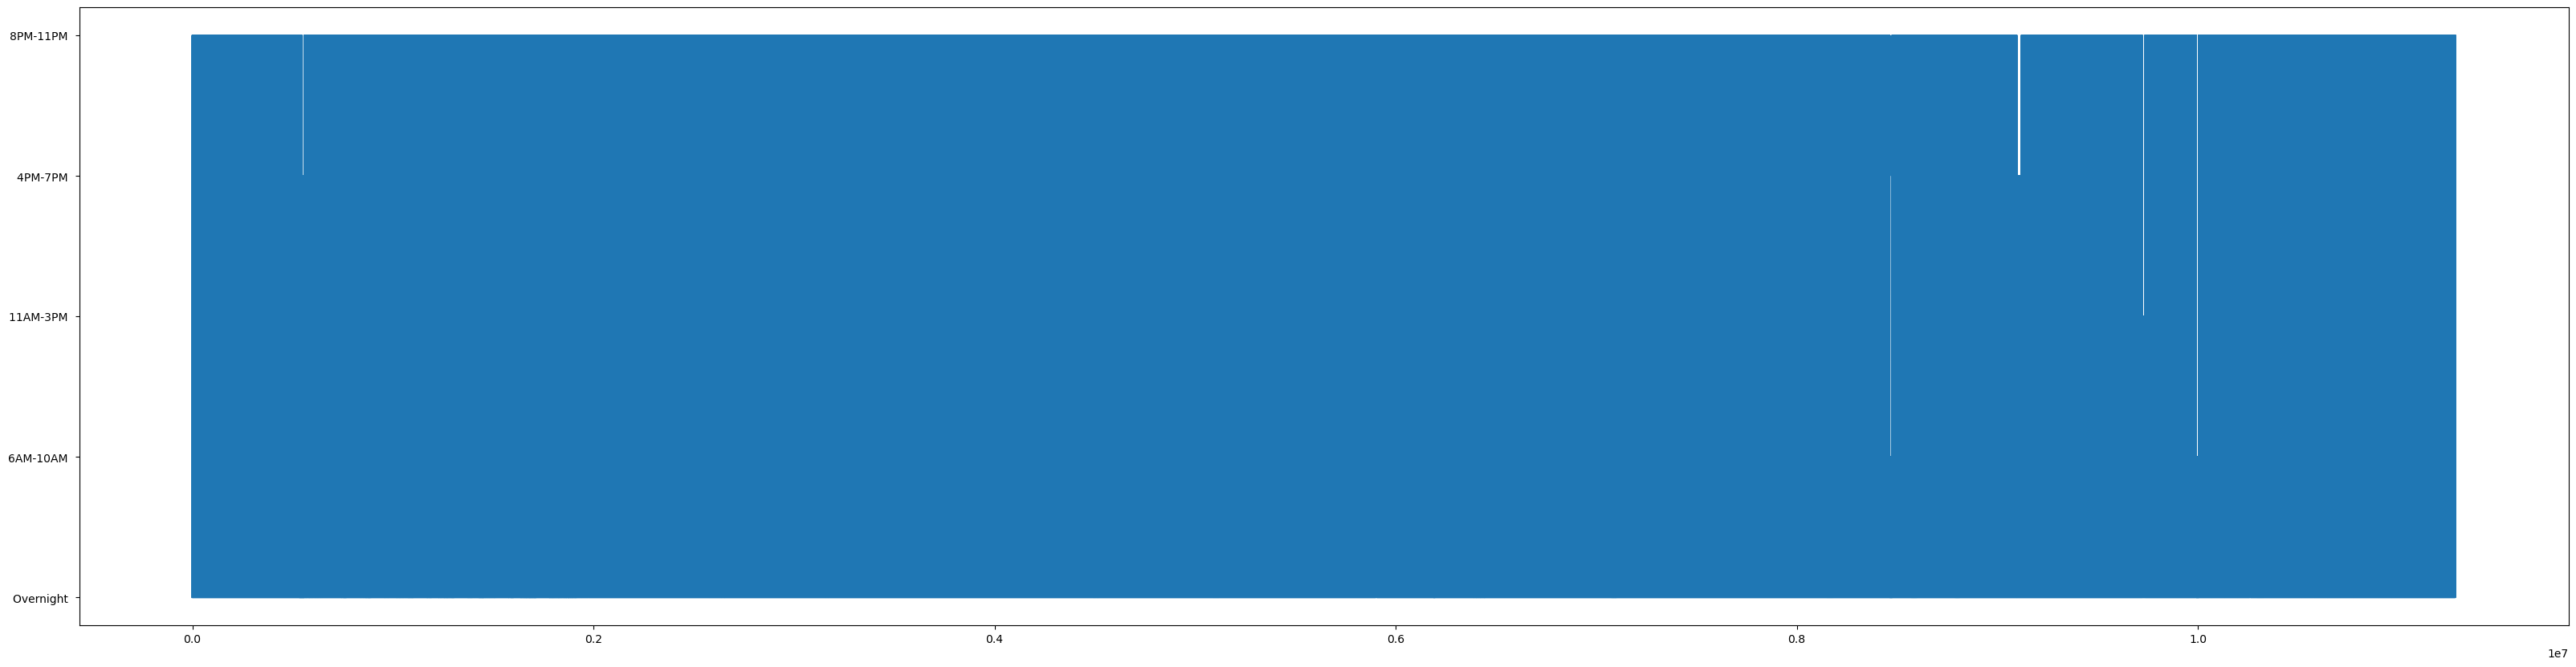

In [18]:
data.sample(50)

,Unnamed: 0,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
1297811,1297811,80,2021-02-12 07:40:03,2021-02-12 07:35:27,ST JAMES HOSPITAL (LUAS),40,23,17,Open,St James Hospital (Luas),53.341358,-6.292951
7912383,2263121,68,2021-09-12 18:55:02,2021-09-12 18:51:39,HANOVER QUAY,40,28,12,Open,Hanover Quay,53.344116,-6.237153
7474125,1824863,89,2021-08-29 01:25:03,2021-08-29 01:21:05,FITZWILLIAM SQUARE EAST,40,27,13,Open,Fitzwilliam Square East,53.335213,-6.250900
6117533,468271,89,2021-07-16 01:05:03,2021-07-16 01:00:51,FITZWILLIAM SQUARE EAST,40,31,9,Open,Fitzwilliam Square East,53.335213,-6.250900
8525422,17983,68,2021-10-01 15:50:02,2021-10-01 15:49:23,HANOVER QUAY,40,26,14,Open,Hanover Quay,53.344116,-6.237153
575641,575641,68,2021-01-19 07:00:03,2021-01-19 06:56:19,HANOVER QUAY,40,15,25,Open,Hanover Quay,53.344116,-6.237153
143323,143323,68,2021-01-05 15:35:02,2021-01-05 15:34:27,HANOVER QUAY,40,37,3,Open,Hanover Quay,53.344116,-6.237153
4450560,1685874,89,2021-05-24 12:20:02,2021-05-24 12:10:12,FITZWILLIAM SQUARE EAST,40,27,13,Open,Fitzwilliam Square East,53.335213,-6.250900
2216607,2216607,68,2021-03-15 00:55:02,2021-03-15 00:50:28,HANOVER QUAY,40,14,26,Open,Hanover Quay,53.344116,-6.237153
7373851,1724589,68,2021-08-26 21:15:02,2021-08-26 21:10:01,HANOVER QUAY,40,27,13,Open,Hanover Quay,53.344116,-6.237153


In [20]:
#df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE","LAST UPDATED","NAME","STATION ID","AVAILABLE BIKE STANDS","STATUS"],axis=1,inplace=True)
#df["TIME"]=pd.to_datetime(df["TIME"])  
#df.sort_values(by=['TIME'],inplace=True)
#df["GAP AMOUNT"]=df["TIME"].diff().dt.seconds/60